<a href="https://colab.research.google.com/github/chayvw18/Deep-Learning-PyTorch/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Deep-Learning/Gradient-Descent

/content/drive/MyDrive/Deep-Learning/Gradient-Descent


Gradient Descent is the single most important fundamental algorithm in all of deep learning.
<br>
How deep learning models learn:
1. Guess a solution
2. Compute the error(mistakes)
3. Learn from mistakes and modify the parameters -

convert step 3 to a mathematical description of the error 'landscape' of the problem, and we need a way to find the minimum of the landscape
<br>
discover a way to find the minimum of that error landscape by telling the model how to make fewer errors, how to learn from the mistakes, and how to modify the parameters so that the future errors are smaller
<br>
The core idea of gradient descent is to find a way to repersent the errors , the mistakes the models are making, as a mathematical function
<br>
then to find the minium of the function, which means that the model is making the fewest mistakes possible.
<br>
gradient is exactly the same as derivative , derivative is typically used for one dimensional functions that you can plot on a two dimensonal axis
<br>
when you have mutliple dimensions and multiple parameters then you use the term gradient
<br>
**Gradient Descent Alogrithm**
<br>
* initialize random guess of minimum
* loop over training iterations
* compute derivative at guess min
* updated guess min is itself minus derivative scaled by learning rate

<br>

***What about local minima***
<br>
Gradient Descent is guaranteed to go 'downhill' meaning down the error landscape but that does not mean it will find the correct or even close to the correct solution
<br>
GD can get stuck in local minima, and can go wrong if parameters are not set right for the particular error landscape.
<br>
*error landscape are impossible to visualize in >2D*
<br>
Local minima for the error function / landscape in deep learning means the model will be most accurate and perform at its best when the errors are minimized.
<br>
You want to find parameters thatget us all the way down in the error landscape
<br>
The GD algorithm is always going to move in the direction of the negative derivative *bad* local minima will get stuck going to the left and right following the derivative
<br>
**The success of deep learning in spite of the 'problems' with gradient descent remains a mystery**
<br>
Local minima is not such a huge problem
<br>
it is possible that there are many good solutions (many good local minima). This interpretation is consistent with the huge diversity of weight configurations that produce similar model performance
<br>
Another possibility is that there are extremely few local minima in high dimensional space. This interpretation is consistent with the complexity and absurd dimensionality of DL models.
<br>
*Saddle Point*: where a dunction has a minimum in one direction and a maximum in another direection
<br>
**GD will get trapped in a local minimum only if that point is a minimum in all dimensions**
<br>
**What to do about local minima**
<br>
When model perdormance is good, dont worry about local minima
<br>
Solution: Retrain model many times using random weights (diffefent starting loactions on the loss landscape) and pick the model that does best
<br>
Solution: Increase the dimensionality(complexity) of the model to have fewer local minima

**Gradient Descent in 1D**
<br>


In [2]:
import numpy as np
import matplotlib.pyplot as plt


from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-2-74a29fc3e137>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
#function

def fx(x):
  return 3 * x**2 - 3 * x + 4

#derivative function
def deriv(x):
  return 6 * x - 3

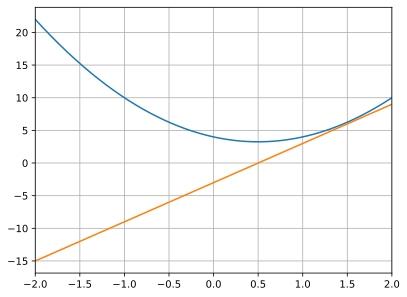

In [4]:
#plot the function and its derivative
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0, -1]])
plt.grid()

In [5]:
#random starting point
localmin = np.random.choice(x, 1)
print(localmin)

#learning parameters
learning_rate = .01
training_epochs = 100

#run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate * grad

localmin

[1.14]


array([0.50131512])

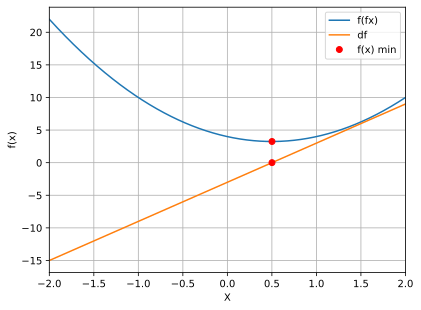

In [6]:
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')


plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('X')
plt.ylabel('f(x)')
plt.legend(['f(fx)', 'df', 'f(x) min'])
plt.show()

**2D Gradient Descent**
<br>
A 1d derivative can be computed at any given point which is the slope of the function
<br>
When it comes to 2D functions there is a derivative alon each dimension or axis
<br>
*Partial Derivatives* are the derivatives of the function ignoring one dimension and only focusing on the other dimension
<br>
you then can put the two partial derivatives in a list, vector or an array and that will be considered the *Gradient*
<br>
∇

In [7]:
#the peaks function
def peaks(x,y):
  #expand to 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
  -10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2)\
  -1/3*np.exp(-(x+1)**2 - y**2)

In [8]:
# create the landscape

x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x,y)

In [10]:
# create derivative functions using sympy

# sx,sy = sym.symbols('sx,sy')

# sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
#       - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
#       - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# # create functions from the sympy-computed derivatives
# df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
# df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )

# df_x(1,1).evalf()